### Preprocessing and Sentiment Analysis

In [145]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.ticker import FuncFormatter
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import FreqDist

%matplotlib inline
sns.set_style("darkgrid")

stop = stopwords.words('english')

In [103]:
tweet_df=pd.read_csv('tweetdf.csv')

In [104]:
tweet_df.head()

,user,created_at,time_zone,full_text,contains_url,favorite_count,location,rt_time_zone,following_count,followers_count,retweet_count,rt_follower_ct,rt_fav_count
0,ISTIM007,2018-11-09 00:02:33+00:00,NaN,President @realDonaldTrump didnt fire Jeff Ses...,0,0,NaN,NaN,395,169,5761,83468.0,10954.0
1,demmar__,2018-11-09 00:02:30+00:00,NaN,"Lucy McBath, a Georgia gun control activist wh...",1,0,NaN,NaN,520,505,956,984883.0,2523.0
2,AmaliaDiaz93,2018-11-09 00:02:27+00:00,NaN,HOLY CRAP! #FLORIDA VOTER Films #BrowardCounty...,1,0,NaN,NaN,16003,16729,6,15159.0,3.0
3,avery1twins2,2018-11-09 00:02:25+00:00,NaN,"An observation: #Midterms2018 #Arizona, #Flori...",0,0,NaN,NaN,83,165,179,102494.0,313.0
4,forgedbytrials_,2018-11-09 00:02:22+00:00,NaN,#chads getting bigger #StealingElections2018 #...,1,0,NaN,NaN,4989,3045,0,NaN,NaN


In [105]:
len(tweet_df.user.unique())

56780

In [106]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70029 entries, 0 to 70028
Data columns (total 13 columns):
user               70029 non-null object
created_at         70029 non-null object
time_zone          0 non-null float64
full_text          70029 non-null object
contains_url       70029 non-null int64
favorite_count     70029 non-null int64
location           438 non-null object
rt_time_zone       0 non-null float64
following_count    70029 non-null int64
followers_count    70029 non-null int64
retweet_count      70029 non-null int64
rt_follower_ct     61610 non-null float64
rt_fav_count       61610 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.9+ MB


In [44]:
#no of unique tweets most are retweets
len(tweet_df.full_text.unique())

12931

In [107]:
#max no of tweets on trump firing jeff sessions
tweet_df.full_text.value_counts()

President @realDonaldTrump didnt fire Jeff Sessions the day after #Midterms2018 because he's afraid of you.\n\nTrump fired him today because now he's coming for you:\n\nHillary\nObama\nComey\nMcCabe\nDWS\nPodesta\nClapper\nBrennan\nStrzok\nPage\nOhr\nLynch\nHolder\nAbedin\nSoros\nJarrett\nKerry\nRice                     5326
democrats snatching back the house from the republicans #ElectionNight https://t.co/lSKnXnq38r                                                                                                                                                                                                                                    3359
Not one American Flag in site...\n\nDraped in the Palestinian flag, radical Rashida Tlaib, 1st Palestinian Muslim congresswomen, proclaims victory\n\nGOP allowed Rashida who has expressed hatred towards Jews, campaigns with HAMAS-linked CAIR &amp; radicals to run unopposed\n#ElectionNight https://t.co/uDEW1eaTLR         1198
CAUGHT: A Broward C

In [135]:
df_grp=tweet_df.groupby(['full_text'])['retweet_count'].max().reset_index()

In [136]:
df_grp.head()

,full_text,retweet_count
0,"""#Democrats' chances of taking the #Senate wer...",0
1,"""#ScottWalker WAS a national disgrace."" Congra...",4
2,"""#VoterSupression Isn’t New for #Disabled Folk...",92
3,"""'I want to see the final numbers before we ma...",1
4,"""...let's talk about the tough world out there...",4


In [140]:
df_new=tweets.merge(df_grp,how='inner',left_on='tweet', right_on='full_text')

In [142]:
df_new.drop(columns=['full_text'],inplace=True)

In [143]:
df_new.to_csv('rtc.csv',index=False)

In [46]:
tweet_df.dtypes

user                object
created_at          object
time_zone          float64
full_text           object
contains_url         int64
favorite_count       int64
location            object
rt_time_zone       float64
following_count      int64
followers_count      int64
retweet_count        int64
rt_follower_ct     float64
rt_fav_count       float64
dtype: object

In [129]:
#creating a df  of all unique tweets
tweets=pd.DataFrame(tweet_df.full_text.unique())
tweets.columns=['tweet']

In [130]:
tweets.head()

,tweet
0,President @realDonaldTrump didnt fire Jeff Ses...
1,"Lucy McBath, a Georgia gun control activist wh..."
2,HOLY CRAP! #FLORIDA VOTER Films #BrowardCounty...
3,"An observation: #Midterms2018 #Arizona, #Flori..."
4,#chads getting bigger #StealingElections2018 #...


In [131]:
tweets.iloc[0,:]

tweet    President @realDonaldTrump didnt fire Jeff Ses...
Name: 0, dtype: object

### Preprocess

In [75]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "") #remove links
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "") #remove @usernames
    df[text_field] = df[text_field].str.strip()#remove \n
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z]", " ") #remove nonstandard characters
    df[text_field] = df[text_field].str.replace(r"@", "")
    df[text_field] = df[text_field].str.lower()#covert to lower case
    return df

In [76]:
clean_tweet=standardize_text(tweets,'tweet')

In [77]:
clean_tweet.tweet[1]

'lucy mcbath  a georgia gun control activist whose    year old son jordan davis was shot dead by a white man over claims he was playing music too loudly in a car  was elected to congress  beating gop rep  karen handel   midterms    '

In [101]:
TextBlob(clean_tweet.tweet[1]).words

WordList(['lucy', 'mcbath', 'a', 'georgia', 'gun', 'control', 'activist', 'whose', 'year', 'old', 'son', 'jordan', 'davis', 'was', 'shot', 'dead', 'by', 'a', 'white', 'man', 'over', 'claims', 'he', 'was', 'playing', 'music', 'too', 'loudly', 'in', 'a', 'car', 'was', 'elected', 'to', 'congress', 'beating', 'gop', 'rep', 'karen', 'handel', 'midterms'])

### Sentiment Analysis

In [86]:
def sentiment_analysis(clean_tweet):
    
    pol = []
    sub=[]
    for tweet in clean_tweet.tweet:
        sentp = TextBlob(tweet).sentiment.polarity
        sents = TextBlob(tweet).sentiment.subjectivity
        pol.append(sentp)
        sub.append(sents    

    sentdf = pd.DataFrame()
    sentdf['polarity'] = pol
    sentdf['subjectivity'] = sub
       
    clean_tweet['Polarity'] = sentdf.polarity
    clean_tweet['Subjectivity'] = sentdf.subjectivity
    
    return clean_tweet

In [87]:
sentiment_analysis(clean_tweet)

,tweet,Polarity,Subjectivity
0,president didnt fire jeff sessions the day af...,-6.000000e-01,0.900000
1,lucy mcbath a georgia gun control activist wh...,0.000000e+00,0.350000
2,holy crap florida voter films browardcounty...,-8.000000e-01,0.800000
3,an observation midterms arizona flori...,2.500000e-01,0.750000
4,chads getting bigger stealingelections ...,0.000000e+00,0.500000
5,did you vote provisionally you have days...,0.000000e+00,0.000000
6,we did it on the latest strangedayspodcast...,5.000000e-01,0.900000
7,gerrymandering has backfired for republican...,0.000000e+00,1.000000
8,andrew gillum narrowly lost to republican ron ...,-6.666667e-02,0.175000
9,one of the big stories of the night is how wel...,2.875000e-01,0.437500


In [90]:
pos_tweets = [ tweet for index, tweet in enumerate(clean_tweet['tweet']) if clean_tweet['Polarity'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(clean_tweet['tweet']) if clean_tweet['Polarity'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(clean_tweet['tweet']) if clean_tweet['Polarity'][index] < 0]

In [94]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(clean_tweet)))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(clean_tweet)))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(clean_tweet)))

Percentage of positive tweets: 51.58147088392236%
Percentage of neutral tweets: 31.142216379243678%
Percentage of negative tweets: 17.276312736833965%


In [95]:
def func(x):
    if x<0:
        return 'negative'
    elif x>0:
        return 'positive'
    else:
        return 'neutral'
    i

In [96]:
clean_tweet['sentiment']=clean_tweet['Polarity'].apply(func)

In [97]:
clean_tweet.head()

,tweet,Polarity,Subjectivity,sentiment
0,president didnt fire jeff sessions the day af...,-0.60,0.90,negative
1,lucy mcbath a georgia gun control activist wh...,0.00,0.35,neutral
2,holy crap florida voter films browardcounty...,-0.80,0.80,negative
3,an observation midterms arizona flori...,0.25,0.75,positive
4,chads getting bigger stealingelections ...,0.00,0.50,neutral


In [144]:
clean_tweet.groupby(['sentiment']).count()

,tweet,Polarity,Subjectivity
sentiment,,,
negative,2234,2234,2234
neutral,4027,4027,4027
positive,6670,6670,6670


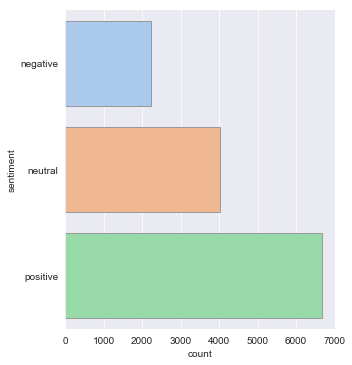

In [148]:
sns.catplot(y="sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=clean_tweet);

In [98]:
clean_tweet.to_csv('clean_tweet.csv',index=False)